In [6]:
exec(open('Template1.py').read())
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# %load http://matplotlib.org/mpl_examples/pylab_examples/contour_demo.py

M1     M2     M3     M4     M5     M6     M7  \
COUNTRY ID          YEAR                                                    
AC      ACW00011604 1961  -1.42   1.83   4.19   7.20  10.75  15.46  15.17   
                    1962   0.60   0.32  -2.07   5.82   8.55  13.28  14.57   
                    1963  -7.66  -6.06  -1.52   4.88  11.71  15.74  15.67   
                    1964   0.09  -1.38   0.02   6.85  11.66  13.89  14.53   
                    1965  -0.09  -1.58  -0.15   5.37   9.34  14.47  14.34   
...                         ...    ...    ...    ...    ...    ...    ...   
ZI      ZIXLT622116 1966  21.80  20.40  18.40  16.90  14.30  12.80  12.10   
                    1967  21.10  19.90  18.90  19.20  15.10  13.50  11.00   
                    1968  21.80  20.00  19.30  18.20  15.60  10.80  13.70   
                    1969  20.90  21.50  19.50  18.30  14.10  13.10  11.60   
                    1970  20.70  19.90  19.30  17.20  15.60  13.30  13.30   

                             M8     M9    M10    M11    M12  
COUNTRY ID          YEAR                                     
AC      ACW00011604 1961  14.28  13.60  11.21   4.57  -0.92  
                    1962  13.40  11.10   9.41   2.70  -1.79  
                    1963  15.43  12.79   8.87   5.13  -1.61  
                    1964  15.04  11.68   7.35   4.93   0.59  
                    1965  14.24  13.24   9.21  -0.22  -2.31  
...                         ...    ...    ...    ...    ...  
ZI      ZIXLT622116 1966  14.60  17.70  19.80  20.90  21.10  
                    1967  13.80  16.60  20.80  19.90  19.10  
                    1968  16.30  17.60  21.80  18.40  20.70  
                    1969  14.60  17.80  21.00  20.40  19.10  
                    1970  15.40  20.40  20.30  21.30  21.50  

[1457908 rows x 12 columns]

LATITUDE  LONGITUDE  ELEVATION                  NAME
COUNTRY ID                                                               
AC      ACW00011604     57.77      11.87       18.0                  SAVE
AE      AE000041196     25.33      55.52       34.0    SHARJAH_INTER_AIRP
        AEM00041184     25.62      55.93       31.0   RAS_AL_KHAIMAH_INTE
        AEM00041194     25.25      55.36       10.4            DUBAI_INTL
        AEM00041216     24.43      54.47        3.0  ABU_DHABI_BATEEN_AIR
...                       ...        ...        ...                   ...
ZI      ZI000067983    -20.20      32.62     1132.0              CHIPINGE
        ZI000067991    -22.22      30.00      457.0            BEITBRIDGE
        ZIXLT371333    -17.83      31.02     1471.0      HARARE_BELVEDERE
        ZIXLT443557    -18.98      32.45     1018.0            GRAND_REEF
        ZIXLT622116    -19.43      29.75     1411.0                 GWELO

[27850 rows x 4 columns]

left_corner = [28, 51.833099365234375]
right_corner = [39.61669921875, 61.96670150756836]


LATITUDE  LONGITUDE  ELEVATION                   NAME
COUNTRY ID                                                                
BO      BOM00026566     55.83      29.98     171.00            YEZERISHCHE
        BOM00026653     55.47      28.77     133.00                POLOTSK
        BOM00026659     54.88      28.70     174.00                  LEPEL
        BOM00026666     55.17      30.22     208.00                VITEBSK
        BOM00026668     54.82      29.68     176.00                  SENNO
...                       ...        ...        ...                    ...
RS      RSXLT584795     59.95      30.70      75.00  STPETERSBURG_VOEJKOVO
        RSXLT697990     55.92      37.52     190.00    MOSKVA_DOLGOPRUDNYJ
        RSXLT738182     60.00      29.80      20.00              KRONSTADT
UP      UPM00033049     52.18      32.58     161.00              SEMENOVKA
        UPM00033058     52.05      33.95     190.00                DRUZHBA

[115 rows x 4 columns]

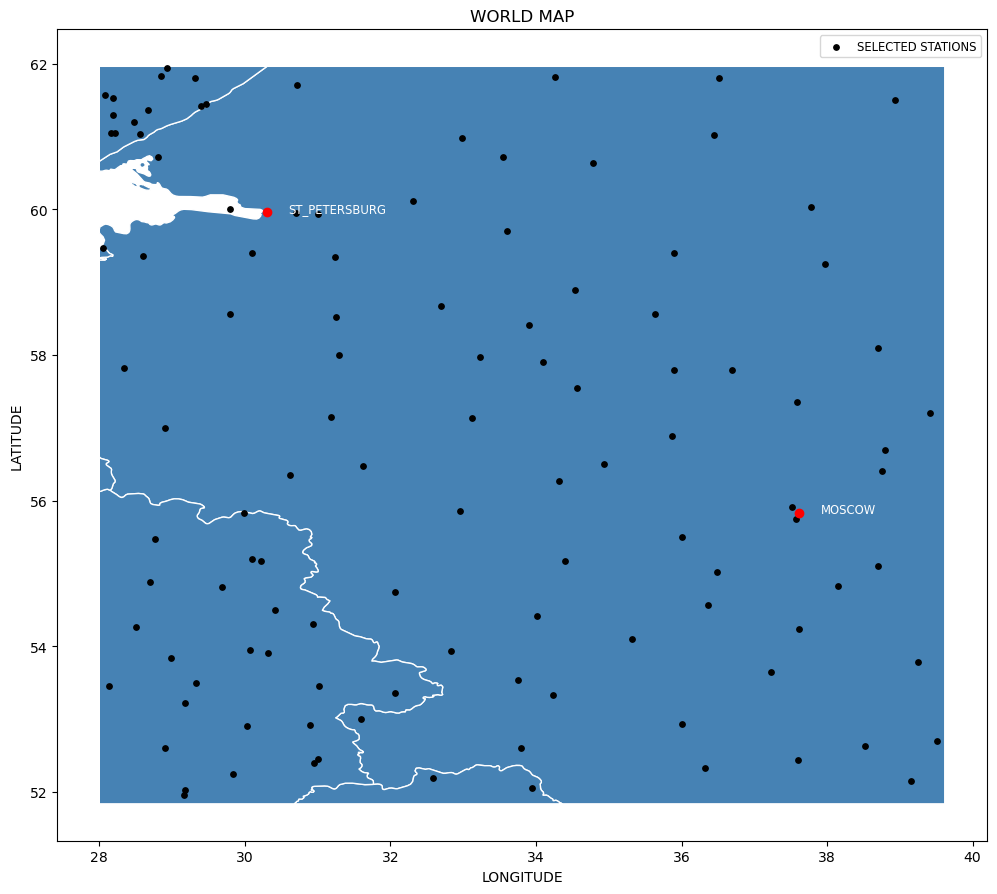

In [26]:
import pandas as pd
import geopandas
from geodatasets import get_path
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pathlib

#RSM00027612  55.8331   37.6167  156.0 MOSCOW
#RSM00026063  59.9667   30.3000    3.0 ST_PETERSBURG 

"""------------PLOT STATIONS USING GEOPANDAS ----------------------------------------------"""

country_labels = ('RS')
boundary_stations = ['RSM00026063', 'RSM00027612']
range_lonlat = [(30,37),(55,59)]

#station radius longitude and lattitude
r = [2,2] 

# -------CLIP SELECTED AREA BY LONGITUDE AND LATITUDE WITH RECTANGUALAR AREA LIMITS ------

#map radius longitude and lattitude
r = [2,2]

#new_left_corner  = [
#                    left_corner[0] - r[0], 
#                    left_corner[1] - r[1]]
#
#new_right_corner = [
#                    right_corner[0] + r[0],
#                    right_corner[1] + r[1]]



boundary_lonlat = pd.concat([
                             msf.loc[(slice(None,None,None), boundary_stations[0]), :],
                             msf.loc[(slice(None,None,None), boundary_stations[1]), :]])

left_corner  = [
                min(boundary_lonlat['LONGITUDE'].min() - r[0], range_lonlat[0][0] - r[0]),
                min(boundary_lonlat['LATITUDE'].min()  - r[1], range_lonlat[1][0]) - r[1]]

right_corner = [
                max(boundary_lonlat['LONGITUDE'].max() + r[0], range_lonlat[0][1] + r[0]),
                max(boundary_lonlat['LATITUDE'].max() + r[1], range_lonlat[1][1]  + r[1])]

print(f'left_corner = {left_corner}\nright_corner = {right_corner}')

stations_lonlat = msf.loc[
                          msf["LONGITUDE"].between(left_corner[0],right_corner[0]) &                           
                          msf["LATITUDE"].between(left_corner[1],right_corner[1])]

display(stations_lonlat)


"""------------PLOT STATIONS USING GEOPANDAS ----------------------------------------------"""

#worldmap file load
home_directory = "D:/" +  "/ClimateData/Data/Maps/ne_10m_admin_0_countries/"
file_name = "ne_10m_admin_0_countries.shp"
location = pathlib.Path(home_directory)
path = location / file_name
world = geopandas.read_file(path)

fig, ax = plt.subplots(figsize=(12,12))
#----------SELECT AREA BY CONTRIES CODE---------------------------------------------------
#iso_coutries = ['BY', 'RU']
#world[world['ISO_A2'].isin(iso_coutries)].plot(ax = ax,color='steelblue')


#plot area map
world.clip(left_corner + right_corner).plot(ax = ax,color='steelblue', edgecolor='white') #lightblue steelblue

#plot selected stations
geometry = [Point(xy) for xy in zip(stations_lonlat['LONGITUDE'], stations_lonlat['LATITUDE'])]
geo_station = geopandas.GeoDataFrame(stations_lonlat, geometry=geometry)
geo_station.plot(ax=ax, marker='o', color='black', markersize=15);

for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE']
    latB = stations_lonlat.loc[idx,'LATITUDE']
    
    geopandas.GeoDataFrame(
                           stations_lonlat.loc[idx,:], 
                           geometry=geopandas.points_from_xy(lonB, latB)).plot(ax=ax, color="red")
    ax.annotate(
                stations_lonlat.loc[idx,'NAME'].values[0],  
                xy=(lonB.values[0]+0.3,latB.values[0]), 
                color='white', fontsize="small")
    
ax.title.set_text("WORLD MAP")
ax.legend(loc='best', fontsize='small', labels=["SELECTED STATIONS"])
ax.set_xlabel("LONGITUDE")
ax.set_ylabel("LATITUDE")

#---LIMITS AXES-------
#ax.set_xlim(29, 39)
#ax.set_ylim(50, 62)

plt.show()


"""----------------PLOT STATION USING PLOTLY -------------------------------------------------------------"""

import plotly.express as px
#import plotly.graph_objects as go

cdf_r = stations_lonlat.reset_index()

fig = px.scatter_mapbox(
                        cdf_r, lat="LATITUDE", lon="LONGITUDE", 
                        hover_name="NAME", hover_data=["ID"],
                        color_discrete_sequence=["blue"], zoom=4, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title_text ="Selected stations on map", title_x=0.5,font_color="black")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":10})


for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE']
    latB = stations_lonlat.loc[idx,'LATITUDE']
    fig_temp = px.scatter_mapbox(
                        lat=latB, lon=lonB,  
                        hover_name = stations_lonlat.loc[idx,'NAME'], 
                        color_discrete_sequence=["red"], size = [10])
    fig.add_trace(fig_temp.data[0])

fig.show()


In [28]:
import numpy as np

#year_labels = (np.arange(2000,2023, 2))
year_labels = (2000)
month_columns = ('M9')

idx = pd.IndexSlice[:, stations_lonlat.index.get_level_values('ID'),year_labels]
cdf = pd.DataFrame(mdf.loc[idx, month_columns]).reset_index(level = 'YEAR', drop =False)
cdf = cdf.dropna(how='any')

""" ---MERGE TEMPERATURE DATA AND STATIONS ATTRIBUTES LONGITUDE, LATITUDE, ELEVATION AND NAME-----------"""
cdf_lonlat = cdf.merge(stations_lonlat, on = ['ID'], how = 'left')
display(cdf_lonlat)


,YEAR,M9,LATITUDE,LONGITUDE,ELEVATION,NAME
ID,,,,,,
BOM00026566,2000,9.56,55.83,29.98,171.00,YEZERISHCHE
BOM00026653,2000,9.63,55.47,28.77,133.00,POLOTSK
BOM00026659,2000,10.35,54.88,28.70,174.00,LEPEL
BOM00026666,2000,9.72,55.17,30.22,208.00,VITEBSK
BOM00026668,2000,10.08,54.82,29.68,176.00,SENNO
...,...,...,...,...,...,...
RSXLT181644,2000,10.30,55.75,37.57,147.00,MOSKVA
RSXLT584795,2000,10.60,59.95,30.70,75.00,STPETERSBURG_VOEJKOVO
RSXLT697990,2000,10.00,55.92,37.52,190.00,MOSKVA_DOLGOPRUDNYJ


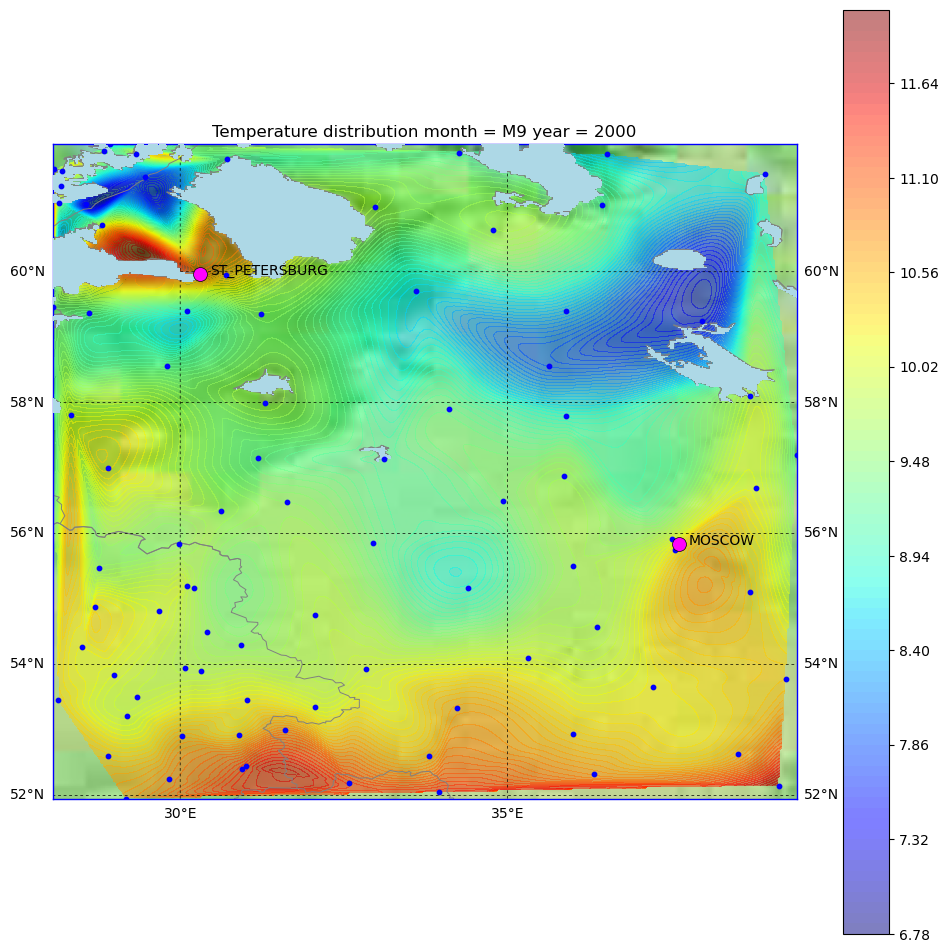

In [29]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

import plotly.graph_objects as go

x = cdf_lonlat.loc[:,'LONGITUDE']
y = cdf_lonlat.loc[:,'LATITUDE']
z = cdf_lonlat.loc[:,month_columns]

sz = len(x)

xi = np.linspace(x.min(), x.max(), 5*sz)
yi = np.linspace(y.min(), y.max(), 5*sz)

X,Y = np.meshgrid(xi,yi)
Z = griddata((x,y),z,(X,Y), method='cubic')

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

#fig = plt.figure(figsize = (12, 12))

fig, ax = plt.subplots(figsize = (12, 12)) 

#m = Basemap()

plt.title(f'Temperature distribution month = {str(month_columns)} year = {str(year_labels)}', fontsize=12)

#https://matplotlib.org/basemap/users/mapsetup.html
m = Basemap(projection = 'cyl', resolution='i', llcrnrlon = x.min(), llcrnrlat = y.min(), urcrnrlon = x.max(), urcrnrlat = y.max()) 

m.contourf(X, Y, Z, levels = 100, cmap=plt.cm.jet, alpha=0.5,  zorder = 2) #linestyles='None',
#m.contour(X, Y, Z, levels = 25, cmap=plt.cm.jet, zorder = 2)

m.drawcoastlines(linewidth=1.0, color='grey')
m.drawcountries(linewidth=0.7, linestyle='solid', color='grey')
m.fillcontinents(color='white',lake_color='lightblue', alpha=0.9)
m.drawmapboundary(color='b', linewidth=1.0, fill_color='lightblue')

m.drawmeridians(range(0, 360, 5), color='k', linewidth=0.5, dashes=[4, 4], labels=[0, 1, 0, 1])
m.drawparallels(range(-90, 100, 2), color='k', linewidth=0.5, dashes=[4, 4], labels=[1, 1, 1, 1])
m.drawlsmask(land_color=(0, 0, 0, 0), ocean_color="lightblue", resolution = 'i', lakes=True, grid=1.25, zorder = 3) #7777ff

#m.shadedrelief(zorder = 1)
#display etopo relief image (from http://www.ngdc.noaa.gov/mgg/global/global.html) -  argument to apply shaded relief image as a background map
m.etopo(scale=2, zorder = 1)

cbar = plt.colorbar()

xm, ym = m(x, y)  # transform coordinates
plt.scatter(xm, ym, 10, marker='o', color='blue', zorder = 3)

for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE'].values[0]
    latB = stations_lonlat.loc[idx,'LATITUDE'].values[0]
    st_name = stations_lonlat.loc[idx,'NAME'].values[0]
    plt.scatter(lonB, latB, 100, marker='o', color='fuchsia',linewidths = 0.5, edgecolors = "black", zorder = 3)
    ax.annotate(st_name, xy = (lonB+0.15, latB), zorder = 3) 
plt.show()


In [ ]:
from sklearn.cluster import KMeans
display(stations_lonlat)

Kmean = KMeans(n_clusters=2)
Kmean.fit(X)


In [ ]:
"""

fig = go.Figure(data=go.Contour(z=Z, x=xi, y=yi, colorscale = 'Hot',contours_coloring='heatmap'))
fig.add_trace(go.Scatter(x = x , y= y, mode='markers', marker = dict(symbol='0', size=8, color = 'blue')))

for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE']
    latB = stations_lonlat.loc[idx,'LATITUDE']
    st_name = stations_lonlat.loc[idx,'NAME']
    fig.add_trace(go.Scatter(x= lonB, y = latB ,  mode='markers', marker = dict(symbol='x', size=16, color = 'black')))
fig.show()

#-----------------------------------------------------

fig, ax = plt.subplots(figsize=(12,12))

cf = ax.contourf(xi, yi, Z, cmap ="magma")


ax.set_title("Temperature countur", fontsize=14)
ax.set_aspect('equal')
ax.set_facecolor('#bc8f8f')

plt.plot(ax=ax, color='white', edgecolor='purple', alpha=0.25)

fig.colorbar(cf, ax=ax)


plt.show()

"""

In [ ]:
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import math

lonv = cdf_lonlat.loc[:,'LONGITUDE'].values
latv = cdf_lonlat.loc[:,'LATITUDE'].values
temperature = cdf_lonlat.loc[:,month_columns].values

#Define mapframe
lllon = math.floor(lonv.min()) #-11
lllat = math.floor(latv.min()) #49
urlon = math.ceil(lonv.max()) #2
urlat = math.ceil(latv.max()) #61

print("lllon, lllat,urlon, urlat =", lllon, lllat,urlon, urlat )
#print("lon = ", lonv)
#print("lat = ", latv)

# set up basemap chose projection!
m = Basemap(projection = 'cyl', resolution='i', 
    llcrnrlon = lllon, llcrnrlat = lllat, urcrnrlon = urlon, urcrnrlat = urlat) 

# transform coordinates to map projection m
mlonv, mlatv = m(*(lonv, latv))

#print("m_lon = ", mlonv)
#print("m_lat = ", mlatv)

# generate grid data
numcols, numrows = 1000, 1000 #240, 240
xin = np.linspace(mlonv.min(), mlonv.max(), numcols)
yin = np.linspace(mlatv.min(), mlatv.max(), numrows)

#print("xi = ", xin)
#print("yi = ", yin)

xt, yt = np.meshgrid(xin, yin)

#print("xi = ", xt)
#print("yi = ", yt)

# interpolate, there are better methods, especially if you have many datapoints
zin = griddata((mlonv,mlatv),temperature,(xt,yt),method='linear')

display(zin)
print("(m_lon,m_lat types)", type(mlonv),type(mlatv))
print("(m_lon,m_lat shapes)", mlonv.shape,mlatv.shape)
print("xi,yi shapes)", xt.shape,yt.shape)
#print(temperature)
#print("(m_lon,m_lat)", (mlonv,mlatv))

fig, ax = plt.subplots(figsize=(12, 12))

# draw map details
m.drawmapboundary(fill_color = 'skyblue', zorder = 1)

# Plot interpolated temperatures
m.contourf(xt, yt, zin, 200, cmap='magma', zorder = 2)

m.drawlsmask(ocean_color='skyblue', land_color=(0, 0, 0, 0), lakes=True, zorder = 3)

cbar = plt.colorbar()
plt.title('Temperature')

plt.show()


In [ ]:
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#Define mapframe
lllon = -11
lllat = 49
urlon = 2
urlat = 61

print("lllon, lllat,urlon, urlat =", lllon, lllat,urlon, urlat )

# Make some toy data, random points + corners
n = 10 # no of stations
lat = np.random.uniform(low=lllat+2, high=urlat-2, size=n)
lat = np.append(lat, [lllat, urlat, urlat, lllat]) 
lon = np.random.uniform(low=lllon+2, high=urlon-2, size=n)
lon = np.append(lon, [lllon, urlon, lllon, urlon])
temp = np.random.randn(n+4) + 8 # British summer?


print("lon = ", lon)
print("lat = ", lat)


# set up basemap chose projection!
m = Basemap(projection = 'cyl', resolution='i', 
    llcrnrlon = lllon, llcrnrlat = lllat, urcrnrlon = urlon, urcrnrlat = urlat) 

# transform coordinates to map projection m
m_lon, m_lat = m(*(lon, lat))

print("m_lon = ", m_lon)
print("m_lat = ", m_lat)

# generate grid data
numcols, numrows = 240, 240
xi = np.linspace(m_lon.min(), m_lon.max(), numcols)
yi = np.linspace(m_lat.min(), m_lat.max(), numrows)

print("xi = ", xi)
print("yi = ", yi)

xi, yi = np.meshgrid(xi, yi)

print("xi = ", xi)
print("yi = ", yi)

# interpolate, there are better methods, especially if you have many datapoints
zi = griddata((m_lon,m_lat),temp,(xi,yi),method='cubic')

print("temp", temp)
print("zi", zi)
fig, ax = plt.subplots(figsize=(12, 12))

# draw map details
m.drawmapboundary(fill_color = 'skyblue', zorder = 1)

# Plot interpolated temperatures
m.contourf(xi, yi, zi, 500, cmap='magma', zorder = 2)

m.drawlsmask(ocean_color='skyblue', land_color=(0, 0, 0, 0), lakes=True, zorder = 3)

cbar = plt.colorbar()
plt.title('Temperature')

plt.show()

In [ ]:
from netCDF4 import Dataset as dataset
nc = dataset('ECMWF_temp2m.nc')
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time'][:]
t2 = nc.variables['p2t'][:]

print(t2[4,:,:])

fig = plt.figure(num=None, figsize=(7, 7) ) 
#m = Basemap(projection='cyl', llcrnrlon=0, llcrnrlat=0, urcrnrlon=180, urcrnrlat=90, resolution='i') #32.5 #3 49 15
m = Basemap(projection='cyl', llcrnrlon=20, llcrnrlat=20, urcrnrlon=70, urcrnrlat=90, resolution='i') #32.5 #3 49 15

x, y = m(*np.meshgrid(lon,lat))

print(y)

cs = m.contourf(x, y ,np.squeeze(t2[4,:,:]), levels = 100, cmap=plt.cm.jet)

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
#m.drawmeridians(range(33, 48, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
#m.drawparallels(range(3, 15, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)

#cbar = m.colorbar(cs, location='right', pad="3%")
#cbar.set_label('Temperature (K)', fontsize=13)
#plt.title('2-meter temperature filled contour map', fontsize=15)
plt.show()

In [ ]:
from random import random
from random import randint
from numpy.random import rand
import matplotlib.pyplot as plt 
import seaborn as sb
import pandas as pd

#0#BR027794310  -3.7000  -40.3500   83.0 SOBRAL
#1#BRM00082994  -9.6600  -35.7000   64.5 MACEIO 
#2#RSM00026063  59.9667   30.3000    3.0 ST_PETERSBURG 
#3#RSM00027612  55.8331   37.6167  156.0 MOSCOW 
#4#WAXLT711578 -22.9400   14.4400 9999.0 WALFISCH_BAY  
#5#USW00094728  40.7789  -73.9692   39.6 NEW_YORK_CNTRL_PK_TWR 
#6#USW00023234  37.6197 -122.3647    2.4 SAN_FRANCISCO_INTL_AP
#7#RSM00032540  52.9831  158.6500   32.0 PETROPAVLOVSK_KAMCHATSKIJ
#8#RSM00031960  43.1167  131.9330  187.0 VLADIVOSTOK
#9#RSM00037099  43.5800   39.7700   57.0 SOTCHI

month_columns = ('M9')

#indices of selected stations
indices = [2, 3, 0, 1]

colors = ['b','r','c','m']

selected_stations = [station_labels[index] for index in indices]

year_labels = (np.arange(1950,2023, 1))

idx_slice = pd.IndexSlice[:, selected_stations, year_labels]
cdf_ = cdf_stations.loc[idx_slice, month_columns].droplevel([0], axis=0)

cdf_ = cdf_.unstack(level=0)
display(cdf_)

r = cdf_.shape[0]

plt.figure(figsize=(15,10))

for i, st in enumerate(selected_stations):
    
    #random Nan to column elements
    rows = np.random.randint(r-1, size = r//10)
    #cdf_.iloc[rows,i] = np.nan
    
    plt.plot(cdf_.iloc[:,i].index.get_level_values('YEAR'), cdf_.iloc[:,i],  marker ='o', color = colors[i])


display(cdf_)

plt.legend(selected_stations)
plt.grid()
plt.show()



plt.figure(figsize=(8,6))
plt.title("Correlation between all stations")
sb.heatmap(data= cdf_.corr(), cmap="rocket", annot=True)
plt.show()

In [ ]:
import scipy
from scipy.stats import ks_2samp

print(cdf_.shape)
print(scipy.stats.shapiro(cdf_.iloc[:,0]))
print(scipy.stats.shapiro(cdf_.iloc[:,2]))

test1 = cdf_.iloc[:,0].to_numpy()
test2 = cdf_.iloc[:,3].to_numpy()

print(ks_2samp(test1,test2))

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

lon = cdf_lonlat.loc[:,'LONGITUDE'].round(1).values
lat = cdf_lonlat.loc[:,'LATITUDE'].round(1).values
temperature = cdf_lonlat.loc[:,'M9'].values

m = Basemap(projection='merc', resolution='i', llcrnrlon=20, llcrnrlat=20, urcrnrlon=90, urcrnrlat=90)
#mlon, mlat = m(*(lon, lat))


numcols, numrows = 50, 50
left_corner = [29, 53.833099365234375]
right_corner = [38.61669921875, 60.96670150756836]

#xi = np.linspace(round(lon.min(),0)-1, round(lon.max(),0)-1, numcols)
#yi = np.linspace(round(lat.min(),0)-1, round(lat.max(),0)+1, numrows)


xi = np.linspace(29, 40, numcols)
yi = np.linspace(50, 65, numrows)


#xi = np.linspace(50, 65, numcols)
#xi = np.arange(round(lon.min(),0)-1, round(lon.max(),0)+1, 0.1)
#yi = np.linspace(mlat.min(), mlat.max(), numrows)
#yi = np.linspace(28, 40, numrows)
#yi = np.arange(round(lat.min(),0)-1, round(lat.max(),0)+1, 0.1)

#x, y = np.meshgrid(xi, yi, indexing='ij')
x1 = [ 3, 8, 10, 11]
y1 = [ 6, 2, 11, 3]
t1 = [ 5, 9,  8,  1]

x1_g = [ 3, 4, 5, 6, 7, 8, 9, 10, 11]
y1_g = [ 3, 4, 5, 6, 7, 8, 9, 10, 11]

x2, y2 = np.meshgrid(x1_g, y1_g, indexing='ij')

z2 = griddata((x1,y1), t1, (x2, y2), method='linear')

#grid_x, grid_y = np.meshgrid(xi, yi)

fig, ax = plt.subplots(figsize=(12, 12))

#plt.contourf(x1_g, y1_g , z1, levels = 100, cmap='magma', zorder = 2)

#m = Basemap(projection = 'merc', resolution='i', 
 #   llcrnrlon = 0, llcrnrlat = 0, urcrnrlon = 12, urcrnrlat = 12) 
#plt.plot(x2, y2 , z2) #, levels = 100, cmap='magma', zorder = 2)
plt.contourf(x2, y2 , z2, levels = 100, cmap='magma', zorder = 2)

#points = cdf_lonlat.loc[:,['LONGITUDE', 'LATITUDE']].round(1).values

#plt.plot(x, y, marker='o', color='k', linestyle='none')
#plt.show()

#print("lon", lon)
#print("lat", lat)

#print("xi", grid_x)
#print("yi", grid_y)
#print("t", temperature)

#zi = griddata(points, temperature, (grid_x, grid_y), method='linear')


print(zi)

#fig, ax = plt.subplots(figsize=(12, 12))

#m.contourf(x, y , zi, levels = 100, cmap='magma', zorder = 2)

"""
x, y, z = lon, lat, t
#zi = griddata(x, y, z, xi, yi)

zi = griddata((x,y), z, (xi, yi), method='nearest')

import matplotlib.pyplot as plt
plt.imshow(zi.T, extent=(0,1,0,1), origin='nearest')

#ww = np.squeeze(np.array(t[:]))
ww = np.array(t[:])

fig = plt.figure(num=None, figsize=(7, 7) ) 
m = Basemap(projection='cyl', llcrnrlon=32.5, llcrnrlat=20, urcrnrlon=50, urcrnrlat=50, resolution='i')
x, y = m(*np.meshgrid(lon,lat))

cs = m.contourf(x, y , ww, levels = 5, cmap=plt.cm.jet)
"""



In [ ]:
import plotly.graph_objects as go
import pandas as pd

mapbox_access_token = open(".mapbox_token").read()

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
locations_name = df.text

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ))

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    ))

fig.update_layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig.show()


In [ ]:
import numpy as np
import pandas as pd
import folium
import branca
from folium import plugins
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage

# Setup
temp_mean = 12
temp_std  = 2
debug     = False

# Setup colormap
colors = ['#d7191c',  '#fdae61',  '#ffffbf',  '#abdda4',  '#2b83ba']
vmin   = temp_mean - 2 * temp_std
vmax   = temp_mean + 2 * temp_std
levels = len(colors)
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)

# Create a dataframe with fake data
df = pd.DataFrame({
    'longitude':   np.random.normal(11.84,     0.15,     1000),
    'latitude':    np.random.normal(55.55,     0.15,     1000),
    'temperature': np.random.normal(temp_mean, temp_std, 1000)})

# The original data
x_orig = np.asarray(df.longitude.tolist())
y_orig = np.asarray(df.latitude.tolist())
z_orig = np.asarray(df.temperature.tolist())

# Make a grid
x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid the values
z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')

# Gaussian filter the grid to make it smoother
sigma = [5, 5]
z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Create the contour
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)

# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)

# Set up the folium plot
geomap = folium.Map([df.latitude.mean(), df.longitude.mean()], zoom_start=10, tiles="cartodbpositron")

# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   0.6,
    }).add_to(geomap)

# Add the colormap to the folium map
cm.caption = 'Temperature'
geomap.add_child(cm)

# Fullscreen mode
plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)

# Plot the data
geomap.save(f'data/folium_contour_temperature_map.html')

In [ ]:
import matplotlib.pyplot as plt
from matrepr import mprint
from matrepr import mdisplay, mprint

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(type(iris))
mprint(X)
mprint(y)

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8, n_init="auto")),
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()






import pandas as pd

# Create a long format DataFrame
df = pd.DataFrame({'Year': [2019, 2019, 2020, 2020], 'Quarter': ['Q1', 'Q2', 'Q1', 'Q2'], 'Sales': [100, 200, 150, 250]})
print(df)
# Pivot the DataFrame
df_pivoted = df.pivot(index='Year', columns='Quarter', values='Sales')

# Print the pivoted DataFrame
print(df_pivoted)

# Fixing random state for reproducibility
np.random.seed(11122222)

N = len(cdf_lonlat)
colors = np.random.rand(N)

from matrepr import mprint
from matrepr import mdisplay, mprint
#mprint(Z, max_rows=None) #, max_cols=None)
#z1= pd.DataFrame(z).stack(level = 0).unstack(level = 0)
#display(z1)
#display(z1.info())

#z_pivoted = z.values.reshape(columns='ID', values='M9')



In [ ]:
try:
    import mkl
#    mkl.set_num_threads(1)
#    mkl.OMP_NUM_THREADS(1)
except:
    pass

import os
#os.environ["MKL_NUM_THREADS"] = "1" 
#os.environ["NUMEXPR_NUM_THREADS"] = "1" 
#os.environ["OMP_NUM_THREADS"] = "1" 
